# Neural Networks, RNN, and LSTM

1. **Neural Networks** - Basic concepts, layers, and training
2. **RNN (Recurrent Neural Networks)** - Sequential data processing
3. **LSTM (Long Short-Term Memory)** - Advanced sequence modeling

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# For data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.20.0
Keras version: 3.11.3


## 2. Neural Network Theory - Basic Components

### Input Layers
Input layers receive data into the neural network. They define the shape and structure of the input data:
- Each input layer node represents a feature in your dataset
- The number of nodes equals the number of input features
- Input layers don't perform any computation, they just pass data forward

### What Happens Inside a Neuron

#### Weights (Learning)
- Weights are parameters that determine the strength of connections between neurons
- Each connection between two neurons has an associated weight
- During training, weights are adjusted to minimize prediction errors
- Weights multiply the input values coming into a neuron

#### Biases
- Biases are additional parameters that allow neurons to shift the activation function
- They help the model fit data better by providing flexibility
- Each neuron typically has one bias value
- Bias is added to the weighted sum before applying the activation function

## 3. Types of Activation Functions

Activation functions determine whether a neuron should be activated (fired) or not. They introduce non-linearity into the network.

### Sigmoid Function
- Output range: (0, 1)
- Use case: Binary classification output layers
- Problem: Vanishing gradient for very large or small inputs

### Tanh Function  
- Output range: (-1, 1)
- Use case: Hidden layers in shallow networks
- Better than sigmoid as it's zero-centered

### ReLU (Rectified Linear Unit)
- Formula: ReLU(x) = max(0, x)
- Output range: [0, ∞)
- Use case: Most common for hidden layers


### Leaky ReLU
- Output range: (-∞, ∞)
- Use case: Alternative to ReLU to avoid "dying neurons"
- Allows small gradient when input is negative

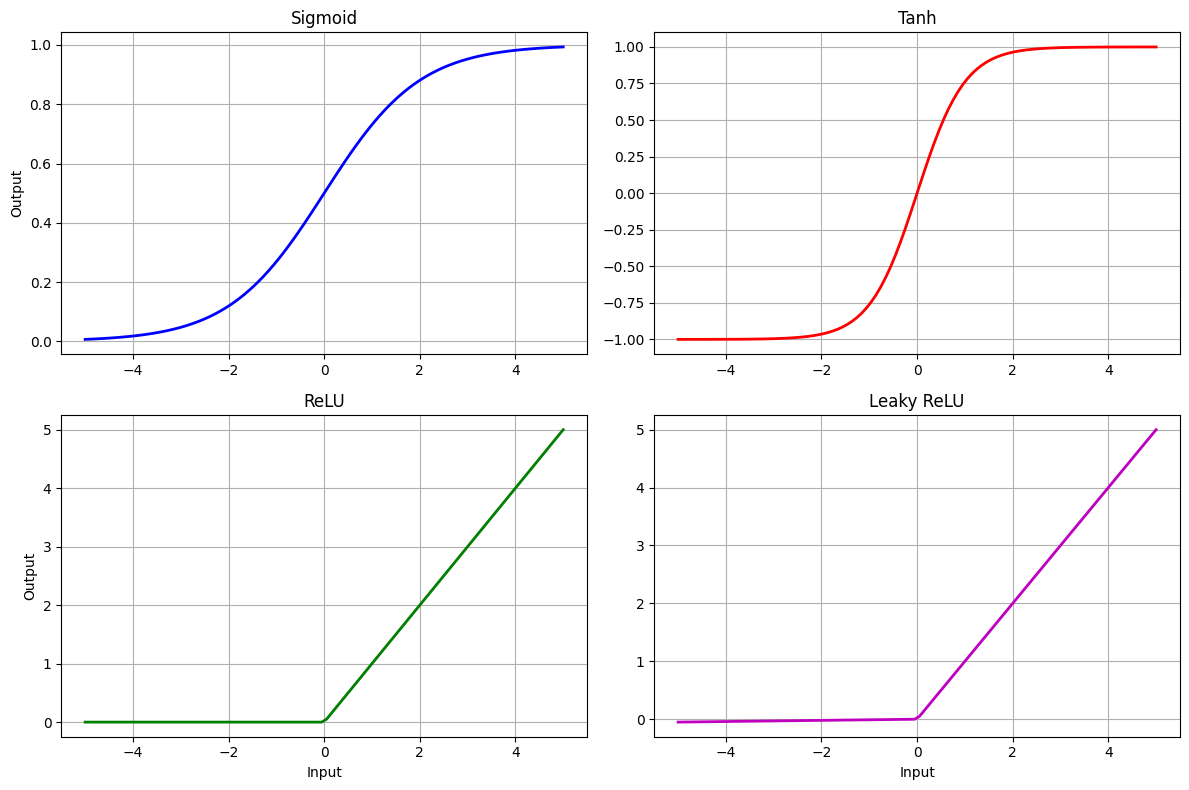

In [2]:
# Let's visualize different activation functions
x = np.linspace(-5, 5, 100)

# Define activation functions
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(0, x)
leaky_relu = np.maximum(0.01 * x, x)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each activation function
axes[0, 0].plot(x, sigmoid, 'b-', linewidth=2)
axes[0, 0].set_title('Sigmoid')
axes[0, 0].grid(True)
axes[0, 0].set_ylabel('Output')

axes[0, 1].plot(x, tanh, 'r-', linewidth=2)
axes[0, 1].set_title('Tanh')
axes[0, 1].grid(True)

axes[1, 0].plot(x, relu, 'g-', linewidth=2)
axes[1, 0].set_title('ReLU')
axes[1, 0].grid(True)
axes[1, 0].set_xlabel('Input')
axes[1, 0].set_ylabel('Output')

axes[1, 1].plot(x, leaky_relu, 'm-', linewidth=2)
axes[1, 1].set_title('Leaky ReLU')
axes[1, 1].grid(True)
axes[1, 1].set_xlabel('Input')

plt.tight_layout()
plt.show()

## 4. Types of Layers Used in Keras

### Dense Layer (Fully Connected)
- Every neuron is connected to every neuron in the previous layer
- Most common layer type for standard neural networks
- Parameters: number of units, activation function

### Dropout Layer
- Randomly sets a fraction of input units to 0 during training
- Helps prevent overfitting by reducing model complexity
- Only active during training, not during testing

### Input Layer
- Defines the shape of input data
- Specifies the number of features the model expects
- First layer in any neural network

### Output Layer
- Last layer that produces the final predictions
- Number of neurons equals the number of classes (classification) or 1 (regression)
- Activation function depends on the task (sigmoid for binary, softmax for multi-class)

### Batch Normalization
- Normalizes inputs to each layer to have mean 0 and variance 1
- Helps with training stability and speed
- Reduces internal covariate shift

Subsequent Hidden Layers
- Decreasing pattern: Each layer has fewer nodes than the previous
- Example: 784 → 128 → 64 → 32 → 10
- Pyramid structure: Gradually funnel down to output
Output Layer
- Classification: Number of classes (10 for MNIST digits)
- Binary classification: 1 node with sigmoid
- Regression: 1 node (or number of target variables)


## Build and Train Neural Network on MNIST

Now let's put theory into practice using the MNIST handwritten digit dataset.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


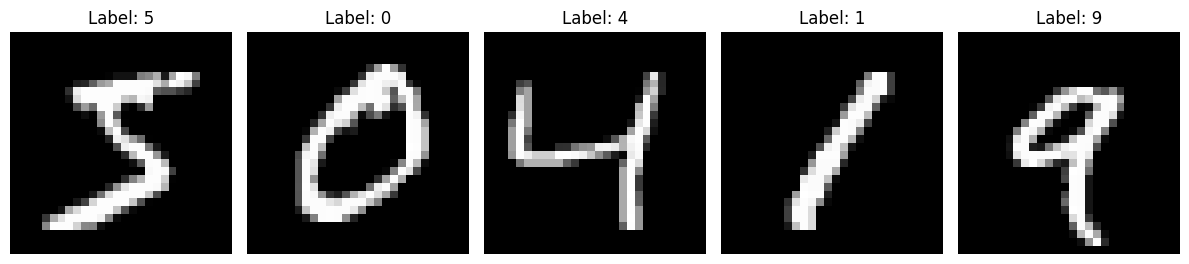

In [ ]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Preprocess the data
# Flatten the 28x28 images to 784-dimensional vectors
x_train_flat = x_train.reshape(x_train.shape[0], 784)
x_test_flat = x_test.reshape(x_test.shape[0], 784)

# Normalize pixel values to range [0, 1]
x_train_flat = x_train_flat.astype('float32') / 255.0
x_test_flat = x_test_flat.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"Flattened training data shape: {x_train_flat.shape}")
print(f"Categorical labels shape: {y_train_cat.shape}")
print(f"Sample one-hot label: {y_train_cat[0]} (original: {y_train[0]})")

Flattened training data shape: (60000, 784)
Categorical labels shape: (60000, 10)
Sample one-hot label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] (original: 5)


In [5]:
# Build the neural network model
model = Sequential([
    # Input layer (784 features from flattened 28x28 image)
    Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    
    # Add dropout for regularization
    Dropout(0.2),
    
    # Second hidden layer
    Dense(64, activation='relu', name='hidden_layer_2'),
    
    # Output layer (10 classes for digits 0-9)
    Dense(10, activation='softmax', name='output_layer')
])

# Display model architecture
model.summary()

# Compile the model
model.compile(
    optimizer='adam',                    # Optimizer (advanced version of gradient descent)
    loss='categorical_crossentropy',     # Loss function for multi-class classification
    metrics=['accuracy']                 # Metric to monitor during training
)

c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

- categorical_crossentropy - multiclass classficiation to_categorial
- spase - multiclass classficiation but with integer 
- binary_cross - for binary calssficiation 

In [6]:
# Train the model
history = model.fit(
    x_train_flat, y_train_cat,
    epochs=10,                    # Number of complete passes through the dataset
    batch_size=128,               # Number of samples processed before updating weights
    validation_split=0.1,         # Use 10% of training data for validation
    verbose=1                     # Show training progress
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8811 - loss: 0.4099 - val_accuracy: 0.9610 - val_loss: 0.1420
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9469 - loss: 0.1769 - val_accuracy: 0.9678 - val_loss: 0.1085
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9608 - loss: 0.1300 - val_accuracy: 0.9723 - val_loss: 0.0935
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9680 - loss: 0.1060 - val_accuracy: 0.9763 - val_loss: 0.0843
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9725 - loss: 0.0891 - val_accuracy: 0.9763 - val_loss: 0.0773
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9760 - loss: 0.0759 - val_accuracy: 0.9777 - val_loss: 0.0774
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9785 - loss: 0.0668 - val_accuracy: 0.9797 - val_loss: 0.0741
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9810 - loss: 0.0610 - val_accuracy: 0.

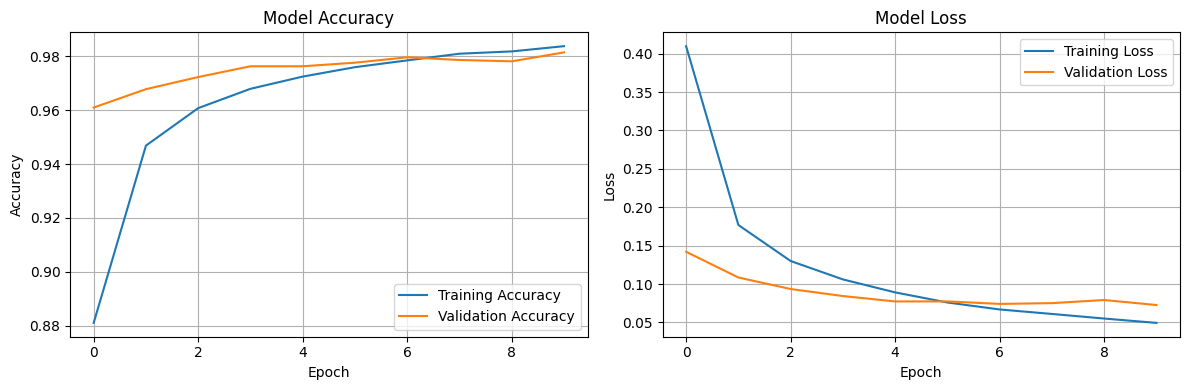

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


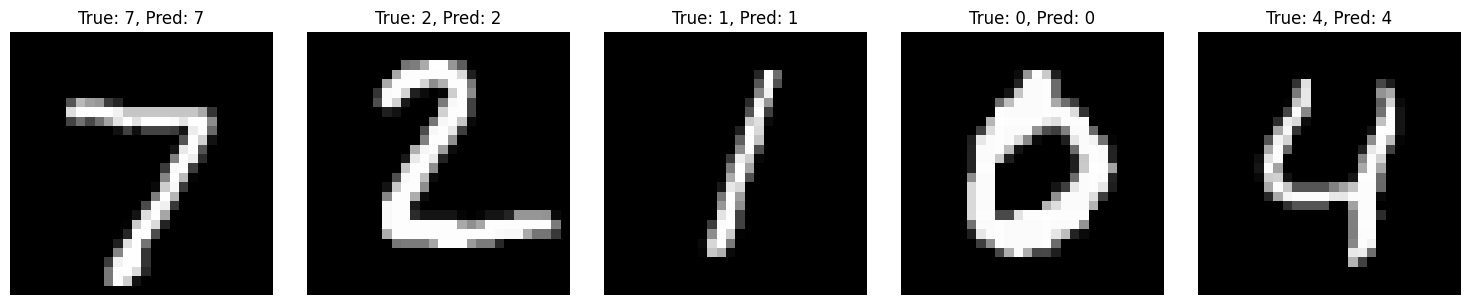

In [7]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Make predictions on a few test samples
predictions = model.predict(x_test_flat[:5])
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 8. RNN Theory - Sequential Data Processing

### What are Recurrent Neural Networks (RNNs)?
RNNs are designed to work with sequential data where the order of inputs matters. Unlike regular neural networks that process each input independently, RNNs have memory.

### Key Concepts

#### Sequential Data
- Time series data (stock prices, weather)
- Text sequences (sentences, paragraphs)
- Audio signals
- Video frames

#### Hidden State
- RNNs maintain a "hidden state" that carries information from previous steps
- The hidden state is updated at each time step
- It acts as the memory of the network

#### Mathematical Formula
At each time step t:
```
h_t = activation(W_h * h_(t-1) + W_x * x_t + b)
y_t = W_y * h_t + b_y
```

Where:
- h_t = hidden state at time t
- x_t = input at time t  
- y_t = output at time t
- W_h, W_x, W_y = weight matrices
- b, b_y = bias vectors

#### Architecture
- Input flows through the network sequentially
- Each time step produces an output and updates the hidden state
- The hidden state connects all time steps together

## 9. Vanishing Gradient Problem in RNNs

### What is the Vanishing Gradient Problem?
During backpropagation through time, gradients can become exponentially small as they propagate backward through many time steps.

### Why Does it Happen?
- RNNs use the same weights at each time step
- When gradients are backpropagated, they are multiplied by these weights repeatedly
- If weights are small (< 1), gradients shrink exponentially
- If weights are large (> 1), gradients explode exponentially

### Consequences
- **Early information loss**: The network forgets what happened at the start of long sequences
- **Training difficulties**: Gradients become too small to effectively update weights for early time steps
- **Short-term memory**: RNNs struggle with long-term dependencies

### Mathematical Explanation
The gradient at time step t depends on gradients from all future time steps:
```
gradient_t = gradient_(t+1) × W × activation_derivative
```
When this is repeated many times, gradients either vanish or explode.

### Practical Impact
- RNNs work well for short sequences (< 10-20 time steps)
- They fail to learn patterns that span long sequences
- Important information from the beginning of sequences gets lost

## 10. LSTM Theory - Memory Cell State

### What is LSTM?
Long Short-Term Memory (LSTM) is a special type of RNN designed to solve the vanishing gradient problem and remember information for longer periods.

### Key Innovation: Cell State
The LSTM introduces a "cell state" (C_t) that flows through the network with minimal changes, allowing information to be preserved over many time steps.

### Memory Cell State (C_t)
- The cell state is like a conveyor belt that carries information through time
- Information can be added to or removed from the cell state
- The cell state is controlled by three gates that learn what to remember and forget
- It flows through the network with only minor linear interactions

### Mathematical Foundation
The cell state allows gradients to flow backward without vanishing because:
- It uses element-wise operations (addition/multiplication)
- It avoids repeated matrix multiplications that cause gradient vanishing
- Gates can learn to preserve important gradients

### Benefits over Standard RNNs
- Can learn long-term dependencies (100+ time steps)
- Better gradient flow during backpropagation
- More selective about what information to store and forget
- More stable training on long sequences

## 11. LSTM Gates - Forget, Input, Output

LSTMs use three gates to control the flow of information in and out of the cell state.

### Forget Gate
**Purpose**: Decides what information to remove from the cell state
**Function**: Looks at the previous hidden state and current input to decide what to forget
**Formula**: 
```
f_t = sigmoid(W_f × [h_(t-1), x_t] + b_f)
```
**Output**: Values between 0 and 1 (0 = completely forget, 1 = completely keep)
**Example**: When processing "The cat sat on the mat", the forget gate might remove gender information when switching from "cat" to "mat"

### Input Gate  
**Purpose**: Decides what new information to store in the cell state
**Function**: Has two parts:
1. **Input gate**: Decides which values to update
2. **Candidate values**: Creates new candidate values to add

**Formulas**:
```
i_t = sigmoid(W_i × [h_(t-1), x_t] + b_i)        # What to update
C̃_t = tanh(W_C × [h_(t-1), x_t] + b_C)          # New candidate values
```
**Function**: The input gate populates the memory matrix with relevant new information

### Output Gate
**Purpose**: Decides what parts of the cell state to output as the hidden state
**Function**: Uses an activation function to control what gets output
**Formulas**:
```
o_t = sigmoid(W_o × [h_(t-1), x_t] + b_o)        # What to output
h_t = o_t × tanh(C_t)                            # Hidden state output
```

### Complete LSTM Update Process
1. **Forget**: Remove irrelevant information from cell state
2. **Input**: Add new relevant information to cell state  
3. **Update**: Combine forget and input operations
4. **Output**: Generate new hidden state from updated cell state

**Cell State Update**:
```
C_t = f_t × C_(t-1) + i_t × C̃_t
```

## 12. Hidden State in LSTM

### What is Hidden State?
The hidden state (h_t) is the output that gets passed to the next time step and can be used for predictions. It's different from the cell state.

### Relationship Between Cell State and Hidden State
- **Cell State (C_t)**: Internal memory that flows through time with minimal changes
- **Hidden State (h_t)**: Filtered version of cell state that serves as output

### How Hidden State is Generated
The hidden state is created by applying the output gate to a filtered version of the cell state:
```
h_t = o_t × tanh(C_t)
```

Where:
- `o_t` is the output gate (decides what to output)
- `tanh(C_t)` squashes cell state values between -1 and 1
- The multiplication filters what information from the cell state becomes the hidden state

### Purpose of Hidden State
- **External Interface**: What the LSTM shares with other layers
- **Predictions**: Used to make predictions at each time step
- **Next Step Input**: Passed as input to the next time step
- **Selective Output**: Contains only relevant information for the current task

### Key Difference from RNN
- **Standard RNN**: Hidden state is the only memory mechanism
- **LSTM**: Hidden state is just the output; cell state provides the long-term memory

## 13. Load and Prepare Time Series Dataset

Now let's compare RNN and LSTM performance on a sequential dataset. We'll create a synthetic time series that requires remembering long-term patterns.

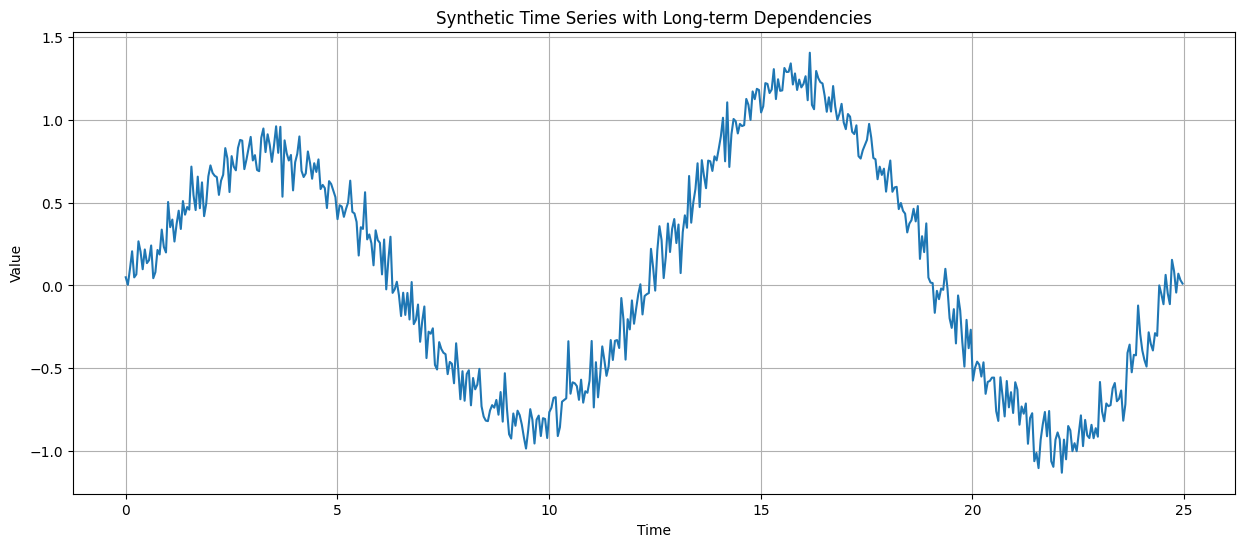

Time series length: 2000
Time series range: [-1.130, 1.772]


In [8]:
# Create a synthetic time series dataset that requires long-term memory
# This will be a sine wave with a slowly changing frequency and amplitude
def generate_time_series(n_samples=2000, sequence_length=50):
    time = np.linspace(0, 100, n_samples)
    
    # Create a complex time series with multiple components
    # Main sine wave
    signal = np.sin(time * 0.5)
    
    # Add a slow-changing amplitude (requires long-term memory to predict)
    amplitude_modulation = 0.5 * np.sin(time * 0.05) + 0.7
    signal = signal * amplitude_modulation
    
    # Add a trend component
    trend = 0.01 * time
    signal = signal + trend
    
    # Add some noise
    noise = 0.1 * np.random.normal(0, 1, n_samples)
    signal = signal + noise
    
    return signal, time

# Generate the dataset
time_series, time_points = generate_time_series()

# Plot the time series
plt.figure(figsize=(15, 6))
plt.plot(time_points[:500], time_series[:500])
plt.title('Synthetic Time Series with Long-term Dependencies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print(f"Time series length: {len(time_series)}")
print(f"Time series range: [{time_series.min():.3f}, {time_series.max():.3f}]")

In [9]:
# Prepare data for RNN/LSTM training
def create_sequences(data, sequence_length):
    """Create input sequences and corresponding targets."""
    X, y = [], []
    
    for i in range(len(data) - sequence_length):
        # Input sequence
        X.append(data[i:(i + sequence_length)])
        # Target is the next value
        y.append(data[i + sequence_length])
    
    return np.array(X), np.array(y)

# Parameters
sequence_length = 50  # Look at 50 time steps to predict the next one

# Normalize the data
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Create sequences
X, y = create_sequences(time_series_scaled, sequence_length)

# Reshape for RNN/LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training sequences: {X_train.shape}")
print(f"Test sequences: {X_test.shape}")
print(f"Sequence length: {sequence_length}")
print(f"Training targets: {y_train.shape}")
print(f"Test targets: {y_test.shape}")

Training sequences: (1560, 50, 1)
Test sequences: (390, 50, 1)
Sequence length: 50
Training targets: (1560,)
Test targets: (390,)


## 14. Build Simple RNN Model

In [ ]:
# Build Simple RNN model
rnn_model = Sequential([
    SimpleRNN(50, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    SimpleRNN(50),
    Dropout(0.2),
    Dense(1)
])

rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

rnn_model.summary()

c:\Program Files\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the RNN model
print("Training Simple RNN...")
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# Evaluate RNN model
rnn_loss = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN Test Loss (MSE): {rnn_loss[0]:.6f}")
print(f"RNN Test MAE: {rnn_loss[1]:.6f}")

Training Simple RNN...
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.1897 - mae: 0.3242 - val_loss: 0.0086 - val_mae: 0.0771
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0531 - mae: 0.1833 - val_loss: 0.0027 - val_mae: 0.0427
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0321 - mae: 0.1409 - val_loss: 0.0069 - val_mae: 0.0717
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0245 - mae: 0.1210 - val_loss: 0.0022 - val_mae: 0.0390
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0194 - mae: 0.1086 - val_loss: 0.0038 - val_mae: 0.0500
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0160 - mae: 0.0987 - val_loss: 0.0018 - val_mae: 0.0349
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0141 - mae: 0.0910 - val_loss: 0.0022 - val_mae: 0.0376
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0121 - mae: 0.0853 - val_loss: 0.0017 - val_mae: 0.0338
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 

## 15. Build LSTM Model

In [ ]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the LSTM model
print("Training LSTM...")
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# Evaluate LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Loss (MSE): {lstm_loss[0]:.6f}")
print(f"LSTM Test MAE: {lstm_loss[1]:.6f}")

Training LSTM...
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - loss: 0.0439 - mae: 0.1468 - val_loss: 0.0062 - val_mae: 0.0690
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0081 - mae: 0.0714 - val_loss: 0.0021 - val_mae: 0.0360
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0061 - mae: 0.0619 - val_loss: 0.0019 - val_mae: 0.0348
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0051 - mae: 0.0553 - val_loss: 0.0015 - val_mae: 0.0304
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0044 - mae: 0.0509 - val_loss: 0.0022 - val_mae: 0.0378
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0043 - mae: 0.0510 - val_loss: 0.0016 - val_mae: 0.0311
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0043 - mae: 0.0514 - val_loss: 0.0018 - val_mae: 0.0339
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0045 - mae: 0.0518 - val_loss: 0.0023 - val_mae: 0.0386
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/

## 16. Compare RNN vs LSTM Performance

In [17]:
# Make predictions
rnn_pred = rnn_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test)

# Print detailed comparison
print("\n" + "="*50)
print("PERFORMANCE COMPARISON")
print("="*50)
print(f"RNN  - Test MSE: {rnn_loss[0]:.6f}, Test MAE: {rnn_loss[1]:.6f}")
print(f"LSTM - Test MSE: {lstm_loss[0]:.6f}, Test MAE: {lstm_loss[1]:.6f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

PERFORMANCE COMPARISON
RNN  - Test MSE: 0.001312, Test MAE: 0.028636
LSTM - Test MSE: 0.001249, Test MAE: 0.027999

PERFORMANCE COMPARISON
RNN  - Test MSE: 0.001312, Test MAE: 0.028636
LSTM - Test MSE: 0.001249, Test MAE: 0.027999
